In [6]:
# Let this box run first, to import all the required packages.

import numpy as np
# Importing standard Qiskit libraries
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

provider = IBMQ.load_account()

print('Well, done!')

ibmqfactory.load_account:WARNING:2022-04-27 08:17:14,394: Credentials are already in use. The existing account in the session will be replaced.


Well, done!


# 3. Combining H, X and C-X gates: Making entanglement visible
You have so far learned what an H, X and C-X gate is. Now we will combine H, X and C-X gates to produce so called entangled states. Entanglement is a phenomenon which is key for quantum computing. And frankly it is quite puzzling at some times! You will get some intuition about it here!


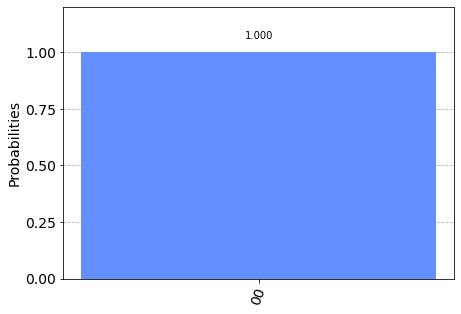

In [7]:
# First we are initializing our quantum circuit with two qubits and two additional registers to store the outcome
# The first number in the brackets gives the number of qubits, the second the number of classical registers
qc = QuantumCircuit(2, 2)

# The following part is to display your results.
# First we are applying a measurement on our circuit by simulating the quantum system
qc.measure(0, 0)
qc.measure(1, 1)

backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend (thats where the computation happens)
counts = execute(qc, backend, shots = 10000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # here we can see our result, plotted as a histogram

You will now add an H gate and a C-X gate to the circuit

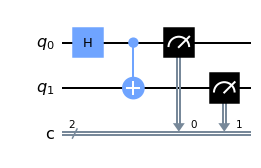

In [15]:
qc = QuantumCircuit(2, 2)

# First apply a H gate to qubit 0
# Then aplly a C-X gate with control qubit 0 and target qubit 1

#
# YOU CODE GOES HERE:
qc.h(0) # adding an hadamard gate on qubit 0
qc.cx(0,1) # adding an controlled not gate
#
#
#
#

qc.measure(0,0)
qc.measure(1,1)

qc.draw()



The state that is produced in this circuit is called a Bell state and it is an entangled state between qubit 0 and qubit 1. We will now look into the results of measuring the two qubits to see the quantum magic happening!

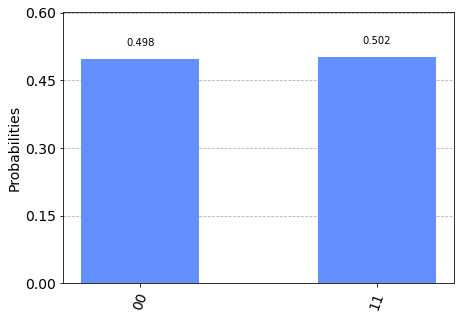

In [16]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend (thats where the computation happens)
counts = execute(qc, backend, shots = 10000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # here we can see our result, plotted as a histogram

You can see that only the states |00> and |11> were measured this is due to the fact that in the moment we measure the first qubits, the second qubit instantly collapses to the same exact state! Isn't this great ?

Let us take a look at yet another entangled state:


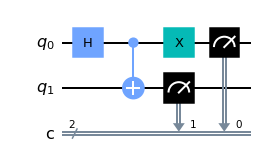

In [17]:
qc = QuantumCircuit(2, 2)

# First apply a H gate to qubit 0
# Then aplly a C-X gate with control qubit 0 and target qubit 1
# Then apply a X gate to qubit 0

#
# YOU CODE GOES HERE:
qc.h(0)
qc.cx(0,1)
qc.x(0)
#
#
#
#

qc.measure(0,0)
qc.measure(1,1)

qc.draw()

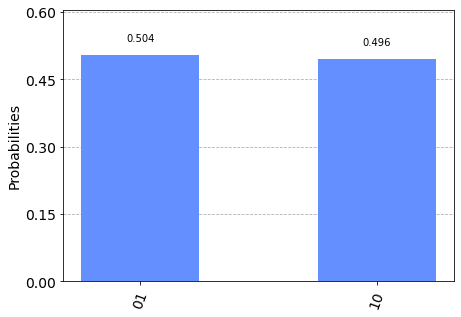

In [18]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend (thats where the computation happens)
counts = execute(qc, backend, shots = 10000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # here we can see our result, plotted as a histogram

Here you can see the exact opposite: The moment we measure a state, the other one decides to be in the exact opposite! Quite spooky right? But that's just how entanglement works! 


Congratulations!